<a href="https://colab.research.google.com/github/syunar/trocr_thai_finetune/blob/main/generate_synts_ocrdata_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# download easy ocr thai dataset

In [1]:
!wget https://raw.githubusercontent.com/JaidedAI/EasyOCR/master/easyocr/dict/th.txt

--2023-04-22 05:43:47--  https://raw.githubusercontent.com/JaidedAI/EasyOCR/master/easyocr/dict/th.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2276160 (2.2M) [text/plain]
Saving to: ‘th.txt’

th.txt              100%[===================>]   2.17M  --.-KB/s    in 0.05s   

2023-04-22 05:43:48 (45.5 MB/s) - ‘th.txt’ saved [2276160/2276160]



# download datav1 (chatgpt+พจนานุกรมไทย)

In [2]:
!gdown 1vDthYHpHRFw-6QFjdxtdW5aM8jrx6Exu

Downloading...
From: https://drive.google.com/uc?id=1vDthYHpHRFw-6QFjdxtdW5aM8jrx6Exu
To: /content/textforocr.txt
100% 826k/826k [00:00<00:00, 19.3MB/s]


# evn setting matplotlib plot thai language

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

# matplotlib ภาษาไทย
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# preprocess data

In [4]:
from bisect import bisect_left

def count_chars(filename):
    # Read the file and get a sorted list of unique characters
    with open(filename, encoding='utf-8') as f:
        chars = sorted(set(f.read().strip()))

    # Initialize a dictionary to store the character counts
    counts = {char: 0 for char in chars}

    # Loop through each character in the file and increment its count
    with open(filename, encoding='utf-8') as f:
        for char in f.read().strip():
            index = bisect_left(chars, char)
            if index < len(chars) and chars[index] == char:
                counts[char] += 1

    return counts

In [5]:
import random
from tqdm.notebook import tqdm

!rm /content/numberical_text.txt

# Define a list of characters
characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '!', ',', '""', '(', ')', '-', '_', '@', '=', '+', '$', '%', '#', '<', '>', "'", "/", "\\", "[", "]", "*", "&", "~", "`"]

for i in tqdm(range(3889)):
    # Generate a list of random characters
    data = [random.choice(characters) for _ in range(10)]

    # Convert the list to a string
    data_string = ''.join(data)
    with open('numberical_text.txt', 'a') as f:
        # Write the contents of both files to the new file
        f.write(data_string + '\n')


rm: cannot remove '/content/numberical_text.txt': No such file or directory


  0%|          | 0/3889 [00:00<?, ?it/s]

In [6]:
# Open the first file in read mode
with open('/content/th.txt', 'r') as f1:
    contents1 = f1.read()
    # Open the second file in read mode
with open('/content/textforocr.txt', 'r') as f2:
    contents2 = f2.read()
with open('/content/numberical_text.txt', 'r') as f2:
    contents3 = f2.read()
    
# Open a new file in write mode
with open('textv2.txt', 'w') as f:
    # Write the contents of both files to the new file
    f.write(contents1)
    f.write(contents2)
    f.write(contents3)


In [7]:
counts = count_chars("/content/textv2.txt")

In [8]:
import pandas as pd

df = pd.DataFrame(list(counts.items()), columns=['key', 'value'])
df = df.drop(0) # drop index 0 which is '\n'
df

,key,value
1,,597
2,!,1079
3,"""",2178
4,#,1124
5,$,1097
...,...,...
117,๕,91
118,๖,27
119,๗,35
120,๘,39


<Axes: xlabel='key'>

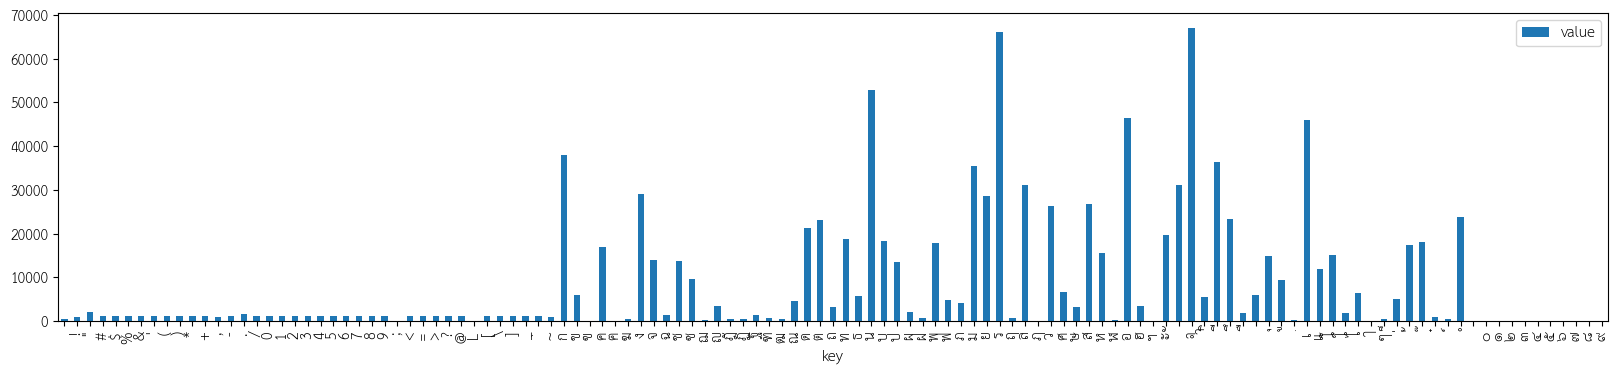

In [9]:
df.plot.bar(x='key', y='value', figsize=(20, 4)) 

<Axes: xlabel='key'>

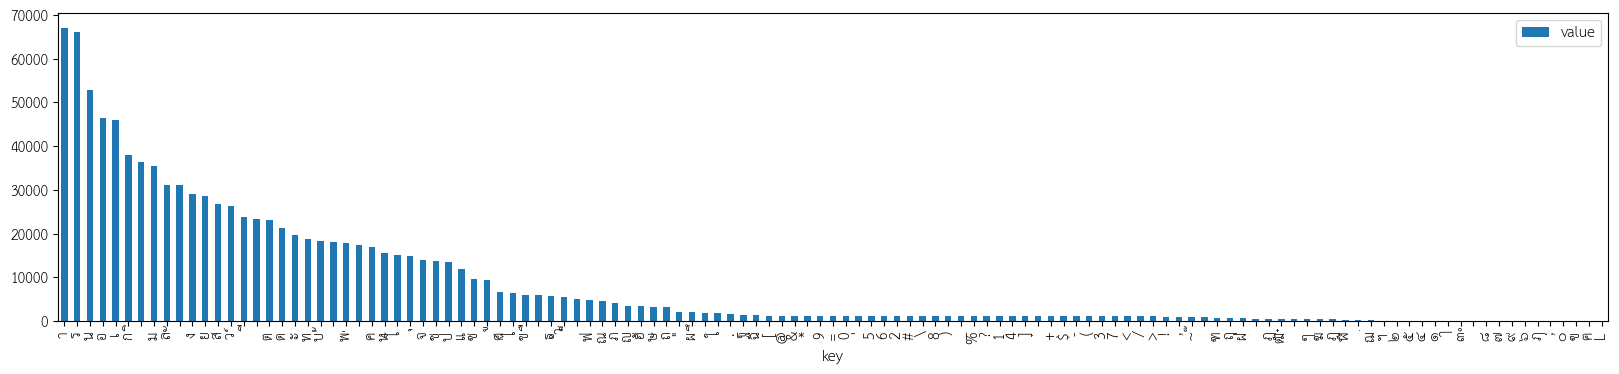

In [10]:
df.sort_values('value', ascending=False).plot.bar(x='key', y='value', figsize=(20, 4)) 

In [16]:
text_df = pd.read_fwf('/content/textv2.txt', header=None)
text_df.columns = ["text"]
text_df

,text
0,เซเว่นธ์
1,ซีน
2,อังกฤษ
3,เป็น
4,วง
...,...
119995,+`*!-)90=4
119996,\?)!_-\<\/
119997,"[[=2&!%7,!"
119998,"0$][""""05>6?"


# download fonts

In [12]:
!gdown 1xBnc136cNKzL1vCeb5JEgKMXs7xNdbIW

Downloading...
From: https://drive.google.com/uc?id=1xBnc136cNKzL1vCeb5JEgKMXs7xNdbIW
To: /content/fonts_no_italic.rar
100% 437k/437k [00:00<00:00, 43.8MB/s]


In [13]:
!unrar x /content/fonts_no_italic.rar


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/fonts_no_italic.rar

Creating    fonts_no_italic                                           OK
Extracting  fonts_no_italic/Arabica.ttf                                   10%  OK 
Extracting  fonts_no_italic/FC Candy.ttf                                  23%  OK 
Extracting  fonts_no_italic/layiji_TarMineTine1.ttf                       30%  OK 
Extracting  fonts_no_italic/layiji_TarMineTine2.ttf                       41%  OK 
Extracting  fonts_no_italic/LeelUIsl.ttf                                  82%  OK 
Extracting  fonts_no_italic/UID Deep sea 2021.ttf                         91%  OK 
Extracting  fonts_no_italic/UID SALMON 2019 .ttf                          99%  OK 
All OK


In [49]:
FONT_DIR = "/content/fonts_no_italic"
IMAGE_DIR = "/content/images"

In [21]:
import os
fonts_lst = os.listdir(FONT_DIR)
len(fonts_lst), fonts_lst

(7,
 ['layiji_TarMineTine1.ttf',
  'UID Deep sea 2021.ttf',
  'layiji_TarMineTine2.ttf',
  'Arabica.ttf',
  'UID SALMON 2019 .ttf',
  'LeelUIsl.ttf',
  'FC Candy.ttf'])

In [50]:
import random
random.seed(42)

file_name = []
fonts = []
for i in range(text_df.shape[0]):
    file_name.append(f"{i+1}.jpg")

    random_number = random.randint(0, len(fonts_lst)-1)
    fonts.append(fonts_lst[random_number])

text_df["file_name"] = file_name
text_df["fonts"] = fonts
text_df

,text,file_name,fonts
0,เซเว่นธ์,1.jpg,LeelUIsl.ttf
1,ซีน,2.jpg,layiji_TarMineTine1.ttf
2,อังกฤษ,3.jpg,layiji_TarMineTine1.ttf
3,เป็น,4.jpg,LeelUIsl.ttf
4,วง,5.jpg,layiji_TarMineTine2.ttf
...,...,...,...
119995,+`*!-)90=4,119996.jpg,layiji_TarMineTine1.ttf
119996,\?)!_-\<\/,119997.jpg,UID SALMON 2019 .ttf
119997,"[[=2&!%7,!",119998.jpg,Arabica.ttf
119998,"0$][""""05>6?",119999.jpg,FC Candy.ttf


In [51]:
text_df["fonts"].value_counts(dropna=False)

Arabica.ttf                17399
LeelUIsl.ttf               17325
layiji_TarMineTine1.ttf    17182
FC Candy.ttf               17175
UID Deep sea 2021.ttf      17038
UID SALMON 2019 .ttf       16951
layiji_TarMineTine2.ttf    16930
Name: fonts, dtype: int64

# generate synt image

In [54]:
from PIL import Image, ImageDraw, ImageFont
from tqdm.notebook import tqdm
import os

# Check if the folder exists
if not os.path.exists(IMAGE_DIR):
    # If the folder doesn't exist, create it
    os.makedirs(IMAGE_DIR)
    print(f"Folder '{IMAGE_DIR}' created.")
else:
    print(f"Folder '{IMAGE_DIR}' already exists.")


for idx, row in tqdm(text_df.iterrows(), total=text_df.shape[0]):
    word = row["text"]
    fonts = row["fonts"]
    save_name = row["file_name"]
    # print(word, fonts, save_name)
    font_path = FONT_DIR + '/' + fonts
    font_size = random_number = random.randint(20, 40) # random size
    font = ImageFont.truetype(font_path, font_size)
    text_width, text_height = font.getsize(word)
    img_width = text_width + (font_size // 3)
    img_height = text_height + font_size // 2
    img = Image.new('RGB', (img_width, img_height), color = (255, 255, 255))
    draw = ImageDraw.Draw(img)
    x = (img_width - text_width) / 2
    y = (img_height - text_height) / 2
    draw.text((x,y), word, font=font, fill=(0,0,0))
    # display(img)
    # print(fonts)
    # print("====")
    img.save(f"{IMAGE_DIR}/{idx+1}.jpg")
    

Folder '/content/images' already exists.


  0%|          | 0/120000 [00:00<?, ?it/s]

In [43]:
!gdown 17CnMTAif3Ent2TekdL4xLixNDUrj87b2
!unzip dataset.zip

Downloading...
From: https://drive.google.com/uc?id=17CnMTAif3Ent2TekdL4xLixNDUrj87b2
To: /content/dataset.zip
100% 968k/968k [00:00<00:00, 116MB/s]


# visualize between real & synt datas

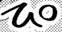

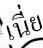

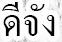

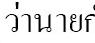

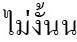

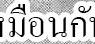

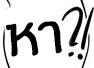

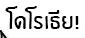

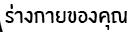

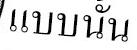

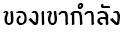

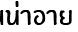

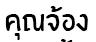

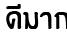

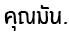

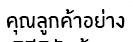

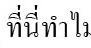

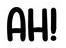

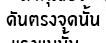

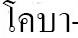

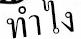

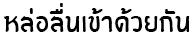

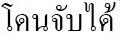

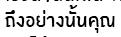

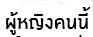

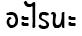

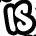

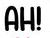

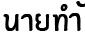

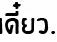

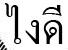

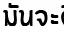

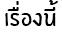

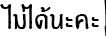

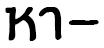

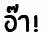

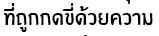

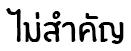

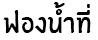

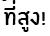

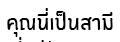

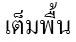

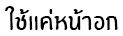

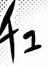

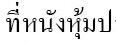

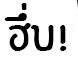

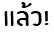

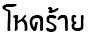

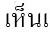

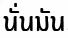

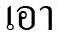

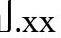

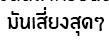

In [55]:
# real datas
import glob
from PIL import Image

img_lst = glob.glob(r"/content/dataset/*.jpg")
for path in img_lst[:100]:
    img = Image.open(path)
    display(img)

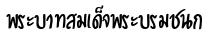

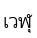

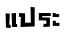

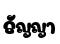

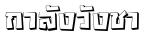

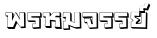

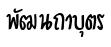

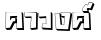

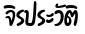

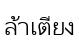

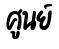

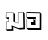

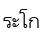

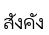

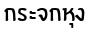

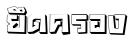

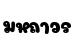

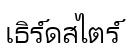

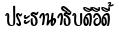

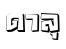

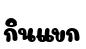

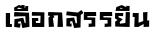

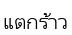

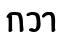

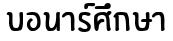

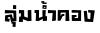

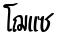

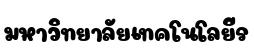

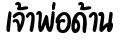

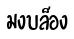

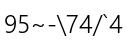

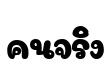

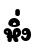

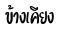

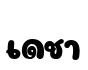

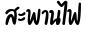

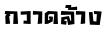

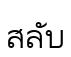

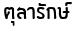

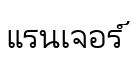

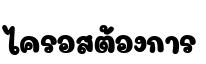

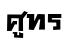

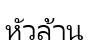

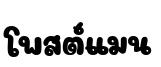

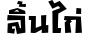

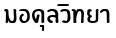

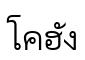

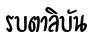

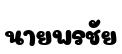

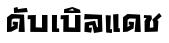

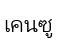

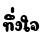

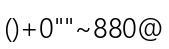

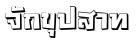

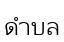

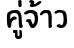

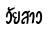

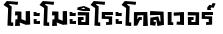

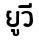

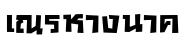

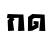

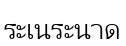

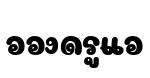

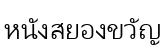

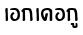

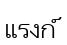

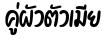

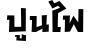

In [56]:
# synt data
import glob
from PIL import Image

img_lst = glob.glob(r"/content/images/*.jpg")
for path in img_lst[:100]:
    img = Image.open(path)
    display(img)

In [57]:
text_df.to_csv("annotation.csv", index=False)

In [58]:
pd.read_csv("annotation.csv")

,text,file_name,fonts
0,เซเว่นธ์,1.jpg,LeelUIsl.ttf
1,ซีน,2.jpg,layiji_TarMineTine1.ttf
2,อังกฤษ,3.jpg,layiji_TarMineTine1.ttf
3,เป็น,4.jpg,LeelUIsl.ttf
4,วง,5.jpg,layiji_TarMineTine2.ttf
...,...,...,...
119995,+`*!-)90=4,119996.jpg,layiji_TarMineTine1.ttf
119996,\?)!_-\<\/,119997.jpg,UID SALMON 2019 .ttf
119997,"[[=2&!%7,!",119998.jpg,Arabica.ttf
119998,"0$][""""05>6?",119999.jpg,FC Candy.ttf


In [59]:
!rm -rf datav2
!mkdir datav2
!cp /content/annotation.csv /content/datav2
!cp -r /content/images /content/datav2

In [64]:
!zip -r datav2.zip datav2

Streaming output truncated to the last 5000 lines.
  adding: datav2/images/65674.jpg (deflated 9%)
  adding: datav2/images/43893.jpg (deflated 8%)
  adding: datav2/images/32548.jpg (deflated 11%)
  adding: datav2/images/65482.jpg (deflated 8%)
  adding: datav2/images/108447.jpg (deflated 13%)
  adding: datav2/images/41128.jpg (deflated 6%)
  adding: datav2/images/4559.jpg (deflated 10%)
  adding: datav2/images/91001.jpg (deflated 14%)
  adding: datav2/images/61552.jpg (deflated 15%)
  adding: datav2/images/91329.jpg (deflated 8%)
  adding: datav2/images/56420.jpg (deflated 8%)
  adding: datav2/images/49904.jpg (deflated 12%)
  adding: datav2/images/33730.jpg (deflated 6%)
  adding: datav2/images/24744.jpg (deflated 10%)
  adding: datav2/images/119677.jpg (deflated 7%)
  adding: datav2/images/52130.jpg (deflated 13%)
  adding: datav2/images/57128.jpg (deflated 5%)
  adding: datav2/images/36512.jpg (deflated 12%)
  adding: datav2/images/37692.jpg (deflated 11%)
  adding: datav2/images/24

In [66]:
!cp datav2.zip /content/drive/MyDrive/for_work/manga_translator/ocr

In [71]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 1s (83.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../tree_1.8.0-1_amd64.deb ...
Unpacking tree (1.8.0-1) ...
Setting up tree (1.8.0-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [76]:
!tree tree --filelimit 3 ./datav2

tree [error opening dir]
./datav2
├── annotation.csv
└── images [120000 entries exceeds filelimit, not opening dir]

1 directory, 1 file
